In [25]:
import numpy as np
from numpy import linalg as LA
 
num_wan = 24
basis_vector = [[3.7470000,0,0],[0,4.5021216,0],[0,0,20]]
E_fermi = -3.015154
K_point_path = [[0, 0, 0], [0.5, 0, 0], [0.5, 0.5, 0], [0, 0, 0], [0, 0.5, 0], [0.5, 0.5, 0]]
k_meshes = [10, 10, 10, 10, 10]
 
Symmetry_point_label1 = "G"
Symmetry_point_label2 = "M"
Symmetry_point_label3 = "K"
Symmetry_point_label4 = "G"

V = np.dot(basis_vector[0], np.cross(basis_vector[1], basis_vector[2]) )
rec = [np.cross(basis_vector[1], basis_vector[2]) * 2 * np.pi / V,
       np.cross(basis_vector[2], basis_vector[0]) * 2 * np.pi / V,
       np.cross(basis_vector[0], basis_vector[1]) * 2 * np.pi / V]


for i in range(len(K_point_path)):
    K_point_path[i] = K_point_path[i][0] * rec[0] + K_point_path[i][1] * rec[1] + K_point_path[i][2] * rec[2]
 
 
def k_path():
    k_point = []
    for i in range(len(K_point_path) - 1):
        interval = np.array(K_point_path[i + 1]) - np.array(K_point_path[i])
        interval = interval / k_meshes[i]
        for j in range(k_meshes[i]):
            k_point.append(np.array(K_point_path[i]) + j * interval)
    return k_point

In [58]:
num_wan = 24
with open("wannier90_hr.dat", "r") as f : lines = f.readlines()
R = [[[] for col in range(num_wan)] for row in range(num_wan)]
T = [[[] for col in range(num_wan)] for row in range(num_wan)]
for line in lines:
    if len(line.split()) == 7:
        r1, r2, r3, n1_f, n2_f, t_real, t_image = list(map(float, line.split()))
        n1, n2 = int(n1_f) - 1, int(n2_f) - 1
        if(abs(t_real)+abs(t_image)>0.1):
            print(n1,n2,r1, r2, r3,t_real)
            R[n1][n2].append([r1, r2, r3])
            T[n1][n2].append([t_real])# + 1j*t_image])

6 7 -5.0 -1.0 0.0 0.086715
6 7 -5.0 0.0 0.0 -0.052552
6 13 -5.0 0.0 0.0 0.018117
6 13 -5.0 1.0 0.0 -0.050929
6 4 -4.0 -1.0 0.0 -0.053092
0 7 -4.0 -1.0 0.0 0.05889
6 7 -4.0 -1.0 0.0 -0.112769
6 12 -4.0 -1.0 0.0 -0.031549
6 13 -4.0 -1.0 0.0 0.132059
6 4 -4.0 0.0 0.0 0.15557
6 6 -4.0 0.0 0.0 -0.033934
6 7 -4.0 0.0 0.0 0.396677
6 8 -4.0 0.0 0.0 0.006796
6 12 -4.0 0.0 0.0 0.025852
6 13 -4.0 0.0 0.0 -0.307452
16 16 -4.0 0.0 0.0 0.087392
6 21 -4.0 0.0 0.0 0.060856
6 0 -4.0 1.0 0.0 0.081602
6 4 -4.0 1.0 0.0 0.063733
6 7 -4.0 1.0 0.0 0.131617
6 8 -4.0 1.0 0.0 0.064327
6 11 -4.0 1.0 0.0 0.089977
6 13 -4.0 1.0 0.0 0.21836
6 15 -4.0 1.0 0.0 -0.05342
6 22 -4.0 1.0 0.0 -0.018117
3 15 -4.0 2.0 0.0 -0.061611
6 21 -4.0 2.0 0.0 0.086124
6 15 -4.0 3.0 0.0 0.065162
15 7 -3.0 -2.0 0.0 -0.069101
6 3 -3.0 -1.0 0.0 -0.058879
16 3 -3.0 -1.0 0.0 -0.046813
0 5 -3.0 -1.0 0.0 0.099417
6 5 -3.0 -1.0 0.0 0.090982
6 6 -3.0 -1.0 0.0 -0.116144
0 7 -3.0 -1.0 0.0 -0.168417
3 7 -3.0 -1.0 0.0 0.070632
8 7 -3.0 -1.0 0.0 0.0

23 9 -1.0 0.0 0.0 0.072668
0 10 -1.0 0.0 0.0 0.095867
1 10 -1.0 0.0 0.0 -0.105601
2 10 -1.0 0.0 0.0 -0.676446
3 10 -1.0 0.0 0.0 0.39821
4 10 -1.0 0.0 0.0 0.054103
6 10 -1.0 0.0 0.0 -0.078571
8 10 -1.0 0.0 0.0 -0.110243
9 10 -1.0 0.0 0.0 -0.304643
10 10 -1.0 0.0 0.0 -0.156917
16 10 -1.0 0.0 0.0 0.357327
18 10 -1.0 0.0 0.0 2.388508
19 10 -1.0 0.0 0.0 -0.052752
20 10 -1.0 0.0 0.0 -0.926679
0 11 -1.0 0.0 0.0 0.391199
1 11 -1.0 0.0 0.0 -0.137585
2 11 -1.0 0.0 0.0 0.069336
3 11 -1.0 0.0 0.0 0.28295
4 11 -1.0 0.0 0.0 -0.138802
8 11 -1.0 0.0 0.0 0.113933
9 11 -1.0 0.0 0.0 -0.599592
10 11 -1.0 0.0 0.0 0.118
14 11 -1.0 0.0 0.0 -0.089596
16 11 -1.0 0.0 0.0 -0.18595
17 11 -1.0 0.0 0.0 1.852059
18 11 -1.0 0.0 0.0 -0.066486
20 11 -1.0 0.0 0.0 0.212191
22 11 -1.0 0.0 0.0 0.032784
23 11 -1.0 0.0 0.0 0.122401
0 12 -1.0 0.0 0.0 0.677432
1 12 -1.0 0.0 0.0 -0.039714
2 12 -1.0 0.0 0.0 0.8479
3 12 -1.0 0.0 0.0 0.243186
4 12 -1.0 0.0 0.0 0.13171
6 12 -1.0 0.0 0.0 -0.084858
9 12 -1.0 0.0 0.0 -1.114189
10 12 -

8 5 0.0 -1.0 0.0 0.040429
9 5 0.0 -1.0 0.0 0.10134
10 5 0.0 -1.0 0.0 0.056467
11 5 0.0 -1.0 0.0 -0.939245
12 5 0.0 -1.0 0.0 -0.58499
13 5 0.0 -1.0 0.0 0.034058
15 5 0.0 -1.0 0.0 -0.123437
17 5 0.0 -1.0 0.0 -0.069282
19 5 0.0 -1.0 0.0 -0.122621
21 5 0.0 -1.0 0.0 0.01419
22 5 0.0 -1.0 0.0 0.147721
23 5 0.0 -1.0 0.0 0.235357
0 6 0.0 -1.0 0.0 0.159151
6 6 0.0 -1.0 0.0 0.094846
18 6 0.0 -1.0 0.0 0.141748
21 6 0.0 -1.0 0.0 0.050164
0 7 0.0 -1.0 0.0 -0.064435
3 7 0.0 -1.0 0.0 -0.122976
4 7 0.0 -1.0 0.0 -0.099051
7 7 0.0 -1.0 0.0 0.21707
11 7 0.0 -1.0 0.0 0.213388
12 7 0.0 -1.0 0.0 0.031372
13 7 0.0 -1.0 0.0 0.019432
15 7 0.0 -1.0 0.0 0.322937
17 7 0.0 -1.0 0.0 0.038639
23 7 0.0 -1.0 0.0 -0.426939
0 8 0.0 -1.0 0.0 -0.121936
3 8 0.0 -1.0 0.0 0.048506
4 8 0.0 -1.0 0.0 -0.07551
7 8 0.0 -1.0 0.0 0.071247
8 8 0.0 -1.0 0.0 -0.296608
9 8 0.0 -1.0 0.0 -0.079733
11 8 0.0 -1.0 0.0 -0.042899
12 8 0.0 -1.0 0.0 0.051125
13 8 0.0 -1.0 0.0 -0.031638
15 8 0.0 -1.0 0.0 0.021919
16 8 0.0 -1.0 0.0 -0.067625
17 8

16 13 0.0 1.0 0.0 0.220239
18 13 0.0 1.0 0.0 0.009195
19 13 0.0 1.0 0.0 -0.045173
1 15 0.0 1.0 0.0 -0.11641
5 15 0.0 1.0 0.0 -0.123437
7 15 0.0 1.0 0.0 0.322937
8 15 0.0 1.0 0.0 0.021919
11 15 0.0 1.0 0.0 -0.113023
13 15 0.0 1.0 0.0 -0.243003
15 15 0.0 1.0 0.0 0.147631
19 15 0.0 1.0 0.0 -0.058276
20 15 0.0 1.0 0.0 -0.127572
21 15 0.0 1.0 0.0 -0.136419
22 15 0.0 1.0 0.0 -0.078641
23 15 0.0 1.0 0.0 -0.08476
3 16 0.0 1.0 0.0 0.082032
8 16 0.0 1.0 0.0 -0.067625
16 16 0.0 1.0 0.0 -0.042627
18 16 0.0 1.0 0.0 -0.005962
1 17 0.0 1.0 0.0 -0.181688
2 17 0.0 1.0 0.0 0.061085
3 17 0.0 1.0 0.0 0.041881
4 17 0.0 1.0 0.0 0.168387
5 17 0.0 1.0 0.0 -0.069282
7 17 0.0 1.0 0.0 0.038639
8 17 0.0 1.0 0.0 -0.321848
9 17 0.0 1.0 0.0 0.282821
10 17 0.0 1.0 0.0 0.782991
11 17 0.0 1.0 0.0 -0.110969
12 17 0.0 1.0 0.0 0.034132
13 17 0.0 1.0 0.0 0.093312
14 17 0.0 1.0 0.0 0.390078
16 17 0.0 1.0 0.0 0.534716
18 17 0.0 1.0 0.0 0.172166
20 17 0.0 1.0 0.0 -0.117495
1 18 0.0 1.0 0.0 -0.022376
6 18 0.0 1.0 0.0 0.141748


3 6 1.0 0.0 0.0 0.139767
6 6 1.0 0.0 0.0 0.54162
8 6 1.0 0.0 0.0 0.050149
9 6 1.0 0.0 0.0 0.153442
10 6 1.0 0.0 0.0 -0.078571
12 6 1.0 0.0 0.0 -0.084858
13 6 1.0 0.0 0.0 0.022627
14 6 1.0 0.0 0.0 -0.092848
16 6 1.0 0.0 0.0 -1.357957
18 6 1.0 0.0 0.0 0.921224
20 6 1.0 0.0 0.0 0.153627
21 6 1.0 0.0 0.0 0.105949
7 7 1.0 0.0 0.0 0.588868
1 8 1.0 0.0 0.0 0.187992
3 8 1.0 0.0 0.0 -0.216891
4 8 1.0 0.0 0.0 -0.140954
5 8 1.0 0.0 0.0 0.101057
7 8 1.0 0.0 0.0 -0.234752
8 8 1.0 0.0 0.0 -0.382287
9 8 1.0 0.0 0.0 -0.311276
10 8 1.0 0.0 0.0 -0.110243
11 8 1.0 0.0 0.0 0.113933
13 8 1.0 0.0 0.0 -0.164072
14 8 1.0 0.0 0.0 0.028155
15 8 1.0 0.0 0.0 -0.100017
16 8 1.0 0.0 0.0 -0.108133
20 8 1.0 0.0 0.0 -0.071206
1 9 1.0 0.0 0.0 0.233476
3 9 1.0 0.0 0.0 0.165569
4 9 1.0 0.0 0.0 -0.171821
5 9 1.0 0.0 0.0 -0.271565
7 9 1.0 0.0 0.0 -0.509247
8 9 1.0 0.0 0.0 -0.441378
9 9 1.0 0.0 0.0 0.110263
10 9 1.0 0.0 0.0 -0.304643
11 9 1.0 0.0 0.0 -0.599592
12 9 1.0 0.0 0.0 -1.114189
13 9 1.0 0.0 0.0 -0.386665
14 9 1.0 0

23 6 2.0 -3.0 0.0 0.077272
15 9 2.0 -3.0 0.0 0.060505
15 16 2.0 -3.0 0.0 0.014347
15 1 2.0 -2.0 0.0 -0.126375
0 3 2.0 -2.0 0.0 -0.068796
15 3 2.0 -2.0 0.0 -0.203905
0 6 2.0 -2.0 0.0 -0.096565
8 6 2.0 -2.0 0.0 0.036509
13 6 2.0 -2.0 0.0 -0.152505
15 6 2.0 -2.0 0.0 -0.043915
17 6 2.0 -2.0 0.0 0.029137
19 6 2.0 -2.0 0.0 0.030056
22 6 2.0 -2.0 0.0 0.050317
23 6 2.0 -2.0 0.0 0.099705
13 8 2.0 -2.0 0.0 -0.05972
15 9 2.0 -2.0 0.0 -0.197767
15 14 2.0 -2.0 0.0 0.109319
23 14 2.0 -2.0 0.0 0.043155
11 16 2.0 -2.0 0.0 -0.049699
15 16 2.0 -2.0 0.0 -0.01997
21 16 2.0 -2.0 0.0 -0.099726
15 20 2.0 -2.0 0.0 -0.152141
0 1 2.0 -1.0 0.0 0.055681
13 1 2.0 -1.0 0.0 -0.118403
15 1 2.0 -1.0 0.0 -0.099118
23 1 2.0 -1.0 0.0 -0.018372
11 2 2.0 -1.0 0.0 -0.017246
15 2 2.0 -1.0 0.0 -0.075143
3 3 2.0 -1.0 0.0 0.001983
4 3 2.0 -1.0 0.0 -0.045314
7 3 2.0 -1.0 0.0 -0.166682
9 3 2.0 -1.0 0.0 0.011374
11 3 2.0 -1.0 0.0 0.174382
15 3 2.0 -1.0 0.0 0.041398
19 3 2.0 -1.0 0.0 -0.04253
23 3 2.0 -1.0 0.0 0.129313
23 4 2.0 -1.

3 16 3.0 1.0 0.0 -0.046813
7 16 3.0 1.0 0.0 0.078625
16 16 3.0 1.0 0.0 -0.066509
19 19 3.0 1.0 0.0 0.075741
7 20 3.0 1.0 0.0 -0.044075
19 21 3.0 1.0 0.0 0.041898
7 22 3.0 1.0 0.0 -0.077448
7 23 3.0 1.0 0.0 -0.186356
7 15 3.0 2.0 0.0 -0.069101
15 6 4.0 -3.0 0.0 0.065162
15 3 4.0 -2.0 0.0 -0.061611
21 6 4.0 -2.0 0.0 0.086124
0 6 4.0 -1.0 0.0 0.081602
4 6 4.0 -1.0 0.0 0.063733
7 6 4.0 -1.0 0.0 0.131617
8 6 4.0 -1.0 0.0 0.064327
11 6 4.0 -1.0 0.0 0.089977
13 6 4.0 -1.0 0.0 0.21836
15 6 4.0 -1.0 0.0 -0.05342
22 6 4.0 -1.0 0.0 -0.018117
4 6 4.0 0.0 0.0 0.15557
6 6 4.0 0.0 0.0 -0.033934
7 6 4.0 0.0 0.0 0.396677
8 6 4.0 0.0 0.0 0.006796
12 6 4.0 0.0 0.0 0.025852
13 6 4.0 0.0 0.0 -0.307452
21 6 4.0 0.0 0.0 0.060856
16 16 4.0 0.0 0.0 0.087392
7 0 4.0 1.0 0.0 0.05889
4 6 4.0 1.0 0.0 -0.053092
7 6 4.0 1.0 0.0 -0.112769
12 6 4.0 1.0 0.0 -0.031549
13 6 4.0 1.0 0.0 0.132059
13 6 5.0 -1.0 0.0 -0.050929
7 6 5.0 0.0 0.0 -0.052552
13 6 5.0 0.0 0.0 0.018117
7 6 5.0 1.0 0.0 0.086715


In [20]:
F=np.array(T).reshape((18, 18, 289))
print(np.max(F[:,:,:]))

2.86474


In [31]:

def phase(R1, R2, R3, k1, k2, k3):
    R1_vector = R1 * np.array(basis_vector[0])
    R2_vector = R2 * np.array(basis_vector[1])
    R3_vector = R3 * np.array(basis_vector[2])
    R_vec = R1_vector + R2_vector + R3_vector
    inner_product = np.dot(R_vec, [k1, k2, k3])
    return np.exp(1j * inner_product)
 
def matrix_construct(factor, R, k1, k2, k3):
    H = np.zeros((num_wan, num_wan), dtype='complex')
    for i in range(num_wan):
        for j in range(num_wan):
            for k in range(len(R[i][j])):
                H[i][j] = H[i][j] + factor[i][j][k][0] * phase(R[i][j][k][0], R[i][j][k][1], R[i][j][k][2], k1, k2, k3)
    return H

In [59]:

k_line = k_path()
nk = len(k_line)
print(nk)
Ek = np.zeros((nk, num_wan))
for i in range(nk):
    H = matrix_construct(T, R, k_line[i][0], k_line[i][1], k_line[i][2])
    E, _ = LA.eigh(H)
    Ek[i, :] = E

50


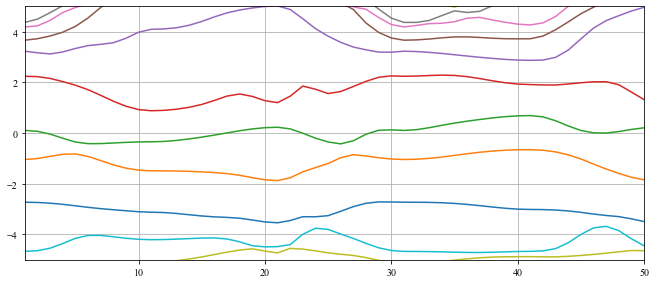

In [60]:
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
plt.figure(figsize=(10,4))
x_line = np.linspace(1, nk, nk)
plt.plot(x_line,Ek-E_fermi)
plt.axis([1,50,-5,5]) 
#plt.xticks([0, 50, 100, 150, 200,250],['$\Gamma$','K','M','$\Gamma$','K`','M'],fontsize='x-large')
#plt.yticks([-10,-8,-6,-4, -2, 0, 2, 4,6,8,10],fontsize='x-large')
plt.grid(axis="x")    
plt.grid(axis="y")    
#plt.margins(0, 0)
plt.subplots_adjust(top=0.98, bottom=0.10, right=0.98, left=0.12, hspace=0.05, wspace=0.05)
#plt.savefig('./'+str('%.2d' % i)+'.jpg',dpi=600,format='jpg')
plt.show()